<a href="https://colab.research.google.com/github/Ruhit43/Time-Screen-Prediction-Using-CNN/blob/main/Time_Screen_Prediction_Using_CNN_Ruhit_10640049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video link- https://mobstatus.com/wp-content/uploads/2022/05/Mr-Bean-Comedy-Type-Dress-Wearing-Status.mp4

Source of the video- https://mobstatus.com/mr-bean-funny-status-video/

In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [ ]:
count = 0

cap = cv2.VideoCapture('/content/Mr-Bean-Comedy-Type-Dress-Wearing-Status.mp4')   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


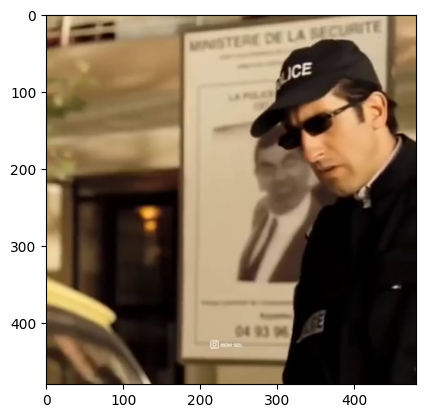

In [ ]:
img = plt.imread('frame10.jpg')   # reading image using its name
plt.imshow(img)

Kid- 1

Mr. Bean - 2

No Mr. Bean or kid - 0

Labeling the images for training the model

In [ ]:
data = pd.read_csv('/content/mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,2
2,frame2.jpg,2
3,frame3.jpg,0
4,frame4.jpg,0


In [ ]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [ ]:
X.shape

(28, 480, 480, 3)

In [ ]:
# y = data.Class
# dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [ ]:
X.shape

(28, 224, 224, 3)

In [ ]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
X = preprocess_input(X)      # preprocessing the input data
X.shape

(28, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set
X_train.shape

(19, 224, 224, 3)

Building the model

In [ ]:
from keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense, InputLayer, Dropout

Loading Rasnet50 model as base model

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, pooling=None, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [ ]:
X_train.shape

(19, 224, 224, 3)

In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

1/1 [==============================] - 1s 1s/step


((19, 7, 7, 2048), (9, 7, 7, 2048))

In [ ]:
X_train = X_train.reshape(19, 7*7*2048)      # converting to 1-D
X_valid = X_valid.reshape(9, 7*7*2048)

In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()
train.shape

(19, 100352)

Building the model into 3 steps:
1. Building the model
2. Compiling the model
3. Training the model

In [ ]:
# 1. Building the model
model = Sequential()
model.add(InputLayer((7*7*2048,)))    # input layer
model.add(Dense(units=1024, activation='relu')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              102761472 
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 102,764,547
Trainable params: 102,764,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_valid.shape

(9, 3)

In [ ]:
# 3. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.1003 - accuracy: 0.3158 - val_loss: 0.7816 - val_accuracy: 0.8889
Epoch 2/100
1/1 [==============================] - 1s 934ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 1.1707 - val_accuracy: 0.8889
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 5.8938e-04 - accuracy: 1.0000 - val_loss: 1.5144 - val_accuracy: 0.8889
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 8.1339e-05 - accuracy: 1.0000 - val_loss: 1.8122 - val_accuracy: 0.8889
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.9794e-05 - accuracy: 1.0000 - val_loss: 2.0771 - val_accuracy: 0.8889
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 6.4559e-06 - accuracy: 1.0000 - val_loss: 2.3158 - val_accuracy: 0.8889
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.5724e-06 - accuracy: 1.0000 - val_loss: 2.5323 - val_accuracy: 0.8889
Epoch 8/100

**Link of the video** - https://mobstatus.com/wp-content/uploads/2022/05/Mr-Bean-As-Master-Chief-Comedy-30sec-Video-Status.mp4

In [ ]:
count = 0

cap = cv2.VideoCapture('/content/Mr-Bean-As-Master-Chief-Comedy-30sec-Video-Status.mp4')
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


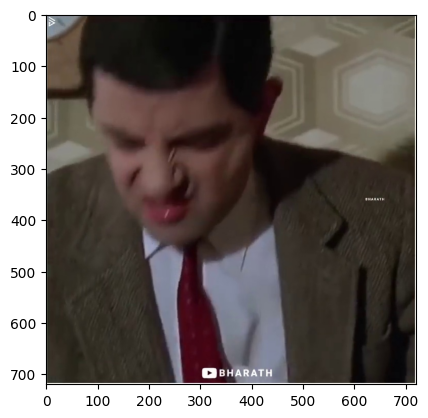

In [ ]:
img = plt.imread('test8.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
test = pd.read_csv('/content/test_demo.csv')

In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
#test_image.shape

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
test_image.shape

(37, 224, 224, 3)

In [ ]:
# extracting features from the images using pretrained model
# test_image = base_model.predict(test_image)

In [ ]:
# preprocessing the images
test_image = preprocess_input(test_image)

In [ ]:
# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

2/2 [==============================] - 4s 556ms/step


In [ ]:
test_image.shape

(37, 7, 7, 2048)

In [ ]:
# converting the images to 1-D form
test_image = test_image.reshape(37, 7*7*2048)

In [ ]:
# zero centered images
test_image = test_image/test_image.max()

Making prediction

In [ ]:
predictions = model.predict(test_image)
predictions

2/2 [==============================] - 0s 37ms/step


array([[4.64711156e-05, 1.43870344e-22, 9.99953449e-01],
       [9.89017963e-01, 1.93754145e-11, 1.09821009e-02],
       [9.91754177e-07, 1.50694789e-23, 9.99998987e-01],
       [4.47441220e-01, 3.07421121e-15, 5.52558839e-01],
       [6.77711904e-01, 1.96353061e-24, 3.22288036e-01],
       [9.51051593e-01, 3.44113244e-23, 4.89482582e-02],
       [9.99973238e-01, 3.51237044e-21, 2.66492843e-05],
       [9.87344921e-01, 4.66319325e-16, 1.26550486e-02],
       [2.46487632e-01, 3.25350294e-22, 7.53512323e-01],
       [9.82580245e-01, 4.87913428e-26, 1.74197480e-02],
       [9.99550223e-01, 7.06734445e-26, 4.49832965e-04],
       [4.25809957e-02, 7.53546931e-26, 9.57418919e-01],
       [1.50765467e-03, 5.47846049e-20, 9.98492360e-01],
       [1.26374979e-02, 1.56035506e-20, 9.87362504e-01],
       [8.35129104e-05, 5.10549673e-23, 9.99916375e-01],
       [1.97632417e-05, 7.69494764e-24, 9.99980152e-01],
       [2.83808749e-05, 2.32960940e-24, 9.99971569e-01],
       [2.13790336e-05, 6.29411

In [ ]:
import numpy as np
pred = np.argmax(predictions, axis=1, out=None)
pred

array([2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [ ]:
from collections import Counter
# Count the occurrences of each value in the pred array
pred_counter = Counter(pred)

# Print the screen time for kid and Mr. Bean
kid_screen_time = pred_counter[1]
mr_bean_screen_time = pred_counter[2]
print("The screen time of kid is", kid_screen_time, "seconds")
print("The screen time of Mr. Bean is", mr_bean_screen_time, "seconds")

The screen time of kid is 0 seconds
The screen time of Mr. Bean is 19 seconds
